<a href="https://colab.research.google.com/github/Ankitha-Poojari/Machine_Learning_Projects/blob/main/ImageDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install --upgrade torch torchvision ultralytics


In [ ]:
pip install --upgrade ultralytics


In [ ]:
pip install ultralytics opencv-python numpy matplotlib


In [ ]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

def detect_people(image_path):
    """Detect people in an image and count them."""
    # Load image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform object detection
    results = model(img_rgb)

    # Extract detected objects
    detections = results.pandas().xyxy[0]
    people = detections[detections['name'] == 'person']

    # Draw bounding boxes around people
    for _, row in people.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 3)

    # Display results
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"People detected: {len(people)}")
    plt.show()

# Run detection on an image
image_path = "/content/picture_people.jpg"  # Replace with your image file path
detect_people(image_path)


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-2-28 Python-3.11.11 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [ ]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Ensure model runs on CUDA if available
model = torch.hub.load('ultralytics/yolov5', 'yolov5s').to(device)

# Process image with autocast
with torch.amp.autocast(device_type=device):
    results = model('/content/picture_people.jpg')  # Replace with your image


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-2-28 Python-3.11.11 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


In [ ]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

# Load pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

def detect_people(image_path):
    """Detect people in an image, count them, and display the processed image."""
    # Load image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Perform object detection
    results = model(img_rgb)

    # Extract detected objects
    detections = results.pandas().xyxy[0]
    people = detections[detections['name'] == 'person']

    # Print count
    num_people = len(people)
    print(f"Number of people detected: {num_people}")

    # Draw bounding boxes
    for _, row in people.iterrows():
        x1, y1, x2, y2 = int(row['xmin']), int(row['ymin']), int(row['xmax']), int(row['ymax'])
        cv2.rectangle(img_rgb, (x1, y1), (x2, y2), (0, 255, 0), 3)

    # Save processed image
    output_path = "processed_image.jpg"
    cv2.imwrite(output_path, cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR))

    # Display processed image
    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"People detected: {num_people}")
    plt.show()

    return output_path  # Return the path of the saved image

# Run detection on an image
image_path = "/content/picture_people.jpg"  # Replace with your image file path
processed_image_path = detect_people(image_path)

# Display the saved processed image
def display_saved_image(image_path):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title("Processed Image with People Detected")
    plt.show()

# Show the processed image
display_saved_image(processed_image_path)


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2025-2-28 Python-3.11.11 torch-2.6.0+cu124 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:894: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


Number of people detected: 14


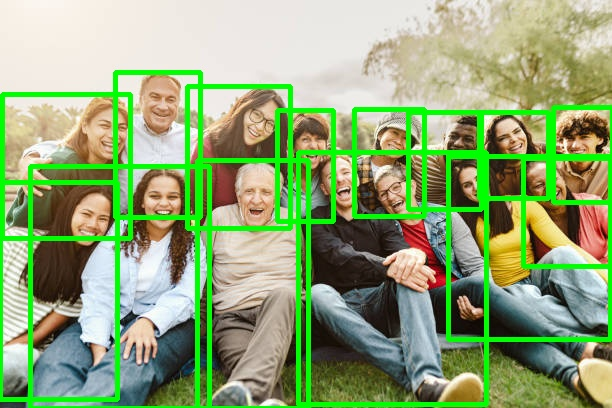

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

def display_image_colab(image_path):
    img = cv2.imread(image_path)
    cv2_imshow(img)  # Use cv2_imshow() instead of cv2.imshow()

# Show the image
display_image_colab("processed_image.jpg")


In [ ]:
img = cv2.imread(image_path)
if img is None:
    print("Error: Image not found or cannot be read!")
else:
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
